In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import pypsg.cfg as cfg
from pypsg.utils import name_file

In [11]:
latitudes = np.linspace(-90, 90, 49)
longitudes = np.linspace(0, 360, 65)[:-1]

In [12]:
start_date = '2019-03-24'
end_date = '2021-02-08'
dates = pd.date_range(
    start=start_date,
    end=end_date,
    periods=24,
    unit='s'
)

In [13]:
dates_list = dates.strftime('%Y/%m/%d %H:%M').to_list()

In [14]:
cfg_path = '../data/cfg/profiles/'

In [15]:
p_edges = np.load('p_edges.npy')

In [16]:
tt = []
h2o = []
co = []
co2 = []
o3 = []
ps = []
ts = []

for date in dates_list:
    for lat in latitudes:
        for long in longitudes:
            temp_cfg = cfg.read_cfg(f"{cfg_path}{name_file('cfg', date, lat, long)}.txt")
            ps.append(cfg.read_cfg(f"{cfg_path}{name_file('cfg', date, lat, long)}.txt")['ATMOSPHERE-PRESSURE'])
            ts.append(cfg.read_cfg(f"{cfg_path}{name_file('cfg', date, lat, long)}.txt")['SURFACE-TEMPERATURE'])
            temp_df = cfg.read_atm_layers(temp_cfg)
            P = temp_df.Pressure.to_numpy()
            T = temp_df.Temperature.to_numpy()
            Water = temp_df.H2O.to_numpy()
            Monoxide = temp_df.CO.to_numpy()
            Dioxide = temp_df.CO2.to_numpy()
            Ozone = temp_df.O3.to_numpy()
            tt.append(np.interp(p_edges,P[::-1],T[::-1], right=np.nan))
            h2o.append(np.interp(p_edges,P[::-1],Water[::-1], right=np.nan))
            co.append(np.interp(p_edges,P[::-1],Monoxide[::-1], right=np.nan))
            co2.append(np.interp(p_edges,P[::-1],Dioxide[::-1], right=np.nan))
            o3.append(np.interp(p_edges,P[::-1],Ozone[::-1], right=np.nan))

In [17]:
meanT = np.nanmean(tt, axis=0)
meanT.shape

(56,)

In [ ]:
meanT = np.nanmean(tt, axis=0)
meanCO2 = np.nanmean(co2, axis=0)
meanCO = np.nanmean(co, axis=0)
meanH2O = np.nanmean(h2o, axis=0)
meanO3 = np.nanmean(o3, axis=0)

In [ ]:
ts = np.array(ts,dtype=float)
meants = np.nanmean(ts)
stdts = np.nanstd(ts)

In [ ]:
df = pd.DataFrame({
    'Pressure' : p_edges,
    'Temperature' : meanT,
    'CO2' : meanCO2,
    'CO' : meanCO,
    'H2O' : meanH2O,
    'O3' : meanO3
})

In [ ]:
df = df.loc[::-1].reset_index(drop=True)

In [ ]:
df

,Pressure,Temperature,CO2,CO,H2O,O3
0,1.325500e-02,181.180000,0.945850,0.001039,0.000005,4.196100e-07
1,8.570400e-03,176.187930,0.961527,0.000726,0.000071,2.385755e-07
2,8.042700e-03,181.980571,0.963324,0.000690,0.000124,1.938198e-07
3,7.564100e-03,187.217162,0.963580,0.000682,0.000176,1.596891e-07
4,7.170300e-03,190.652829,0.963620,0.000680,0.000197,1.364302e-07
5,6.796400e-03,192.945764,0.963575,0.000680,0.000200,1.205229e-07
6,6.424000e-03,194.206367,0.963571,0.000680,0.000197,1.099288e-07
7,6.067900e-03,195.018507,0.963593,0.000680,0.000194,1.006803e-07
8,5.716100e-03,195.976237,0.963535,0.000682,0.000190,9.107215e-08
9,5.406780e-03,196.508601,0.963526,0.000682,0.000184,8.416159e-08


In [ ]:
df.loc[0,'H2O'] = df.loc[2,'H2O']
df.loc[1,'H2O'] = df.loc[2,'H2O']

df['HCl'] = 1e-9
#df['HDO'] = 0.00172*df['H2O']

In [ ]:
df.to_csv('mean_profile.csv', index=False, float_format='%.4e')

In [ ]:
hh = 10
ps = df.Pressure[0]
aa = -hh*np.log(df.Pressure.to_numpy()/ps)
aa
df.insert(2, 'Altitude', aa)

In [28]:
df.to_csv('mean_profile.csv', index=False)

In [31]:
df.to_csv('mean_profile.csv', index=False)

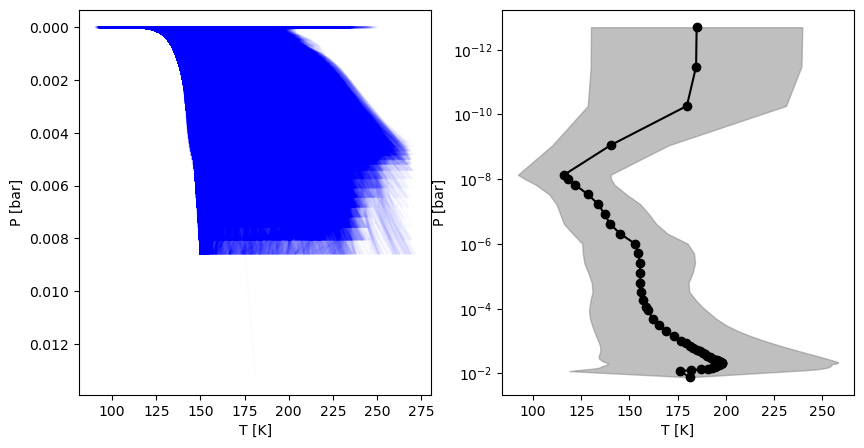

In [21]:
T = np.asarray(tt)
meanT = np.nanmean(tt, axis=0)
sdT = np.nanstd(tt, axis = 0)
fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(T.T, p_edges, alpha=0.01, color='blue')
ax[0].invert_yaxis()
ax[0].set_xlabel('T [K]')
ax[0].set_ylabel('P [bar]')
ax[1].set_yscale('log')
ax[1].plot(meanT, p_edges, color = 'black', marker='o')
ax[1].fill_betweenx(p_edges, meanT-2*sdT, meanT+2*sdT, color = 'grey', alpha = 0.5)
ax[1].invert_yaxis()
ax[1].set_xlabel('T [K]')
ax[1].set_ylabel('P [bar]')
plt.show()

array([27.39662052, 27.30958224, 25.69366075, 15.08214723, 11.99881063,
       11.14523202, 10.19789166, 10.00238205, 10.86844716, 11.48121764,
       11.96464516, 12.29197175, 13.65460698, 14.41239208, 14.33651436,
       13.4996793 , 12.53751745, 12.53894235, 13.68429837, 14.61178498,
       15.19666982, 16.33562437, 17.39999258, 18.67333409, 20.07664396,
       21.56932117, 22.44698897, 23.27860463, 24.1329793 , 25.02879251,
       25.82240866, 26.67963378, 27.48602666, 28.1733365 , 28.73747163,
       29.21222123, 29.53901931, 29.74162915, 29.95758955, 30.05064684,
       30.15126563, 30.16993264, 30.09410562, 29.87457438, 29.54038077,
       29.16030643, 29.08733003, 29.33490155, 29.58247015, 29.58527932,
       29.56840562, 29.63697289, 29.85222071, 29.66659707, 28.64948654,
        0.        ])

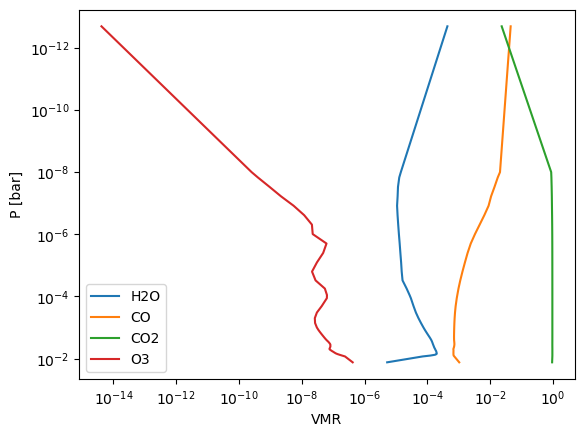

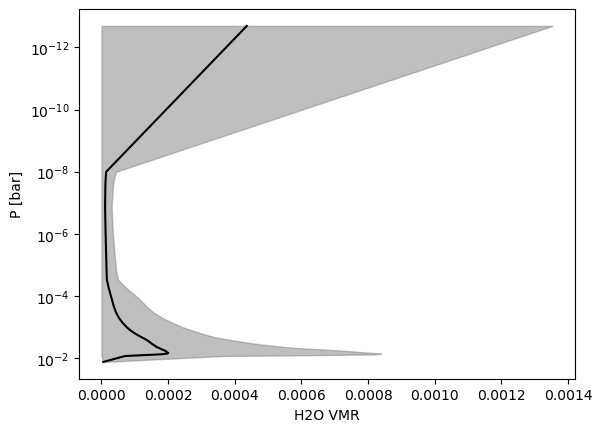

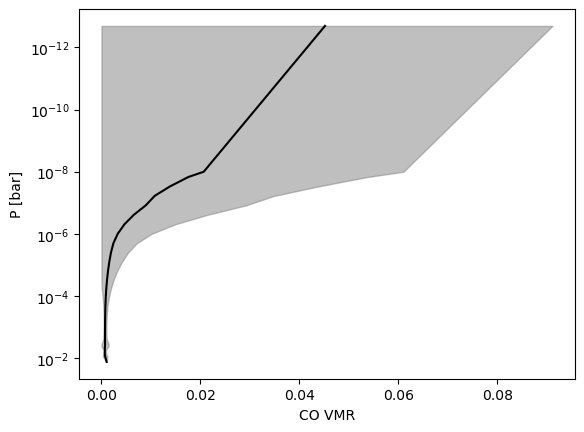

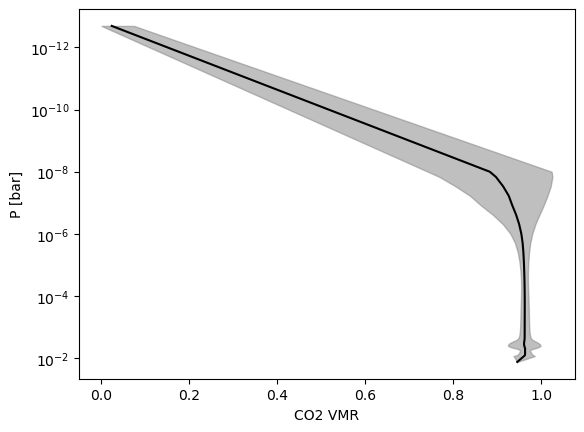

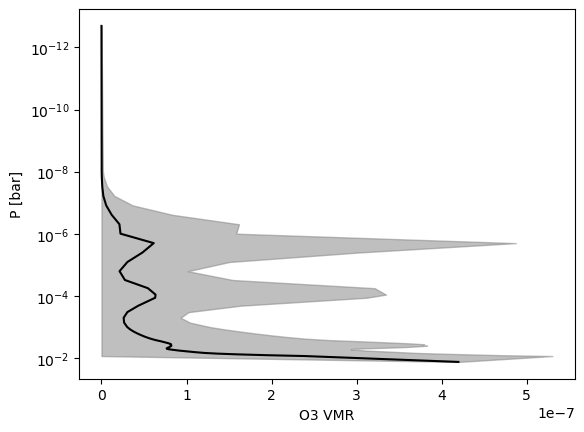

In [11]:
listlist = [h2o, co, co2,o3]
listnames = ['H2O', 'CO', 'CO2', 'O3']
list_mean =[]
list_sd = []
fig2,ax2 = plt.subplots()
for i,obj in enumerate(listlist):
    obj = np.asarray(obj)
    mean = np.nanmean(obj, axis = 0)
    sd = np.nanstd(obj, axis = 0)
    list_mean.append(mean)
    list_sd.append(sd)
    fig,ax = plt.subplots()
    ax.plot(mean, p_edges, color = 'black')
    ax.fill_betweenx(p_edges, np.maximum(mean-2*sd,0), mean+2*sd, color = 'grey', alpha = 0.5)
    ax.invert_yaxis()
    ax.set_yscale('log')
    ax.set_ylabel('P [bar]')
    ax.set_xlabel(f'{listnames[i]} VMR')
    ax2.plot(mean, p_edges, label=listnames[i])
ax2.invert_yaxis()
ax2.set_yscale('log')
ax2.set_ylabel('P [bar]')
ax2.set_xlabel('VMR')
ax2.set_xscale('log')
ax2.legend()
plt.show()